# Préparation du dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


On charge le mappeur qui charge l'image to categorie

In [40]:
df_mapper_image_to_categorie = pd.read_csv("image_to_categorie.csv")
df_mapper_image_to_categorie.head()

,image,product_name,categorie
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas Cotton Bath Towel,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa Cotton Terry Face Towel Set,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing


# 2 - Chargement et processing du jeu de données train

In [41]:
import os
import pandas as pd

# Path to your folder containing images
folder_path = "./data/Flipkart/Images/dataset_train_sample/"

# List all files in the folder
image_files = os.listdir(folder_path)

# (Optional) Keep only image files based on extensions
valid_ext = (".jpg", ".jpeg", ".png", ".webp", ".bmp", ".gif", ".tiff")
image_files = [f for f in image_files if f.lower().endswith(valid_ext)]

# Create the dataframe
df_liste_images_train = pd.DataFrame({"image": image_files})

print(df_liste_images_train.head())


                                  image
0  0991e8d8f884003ab18890971191085d.jpg
1  968a2b3be84193e3f755c2fe71033a2c.jpg
2  908cc351957d02f72f60916006c531ba.jpg
3  789cf5578f48577a44586fca3adc35d0.jpg
4  01089dc3618a0ab7304d784ef400b83d.jpg


In [42]:
df_merged_train = df_liste_images_train.merge(df_mapper_image_to_categorie, on="image", how="left")
df_merged_train.head()

,image,product_name,categorie
0,0991e8d8f884003ab18890971191085d.jpg,Zero Baby Girl's Leggings,Baby Care
1,968a2b3be84193e3f755c2fe71033a2c.jpg,Sovam International Krishna With Cow Idol Show...,Home Decor & Festive Needs
2,908cc351957d02f72f60916006c531ba.jpg,Rajo Raja Mahavastu Buddha Artpiece Showpiece ...,Home Decor & Festive Needs
3,789cf5578f48577a44586fca3adc35d0.jpg,Shop Rajasthan Abstract Single Dohar Multicolor,Home Furnishing
4,01089dc3618a0ab7304d784ef400b83d.jpg,KLIQVIK SIX PORT USB HUB FOR I PHONE 4 MOBILES...,Computers


In [43]:
df_merged_train_cleaned = df_merged_train.drop(['product_name'], axis=1)
df_merged_train_cleaned = df_merged_train_cleaned.rename(columns={
    "image": "image_path",
    "categorie": "label_name"
})
df_merged_train_cleaned

,image_path,label_name
0,0991e8d8f884003ab18890971191085d.jpg,Baby Care
1,968a2b3be84193e3f755c2fe71033a2c.jpg,Home Decor & Festive Needs
2,908cc351957d02f72f60916006c531ba.jpg,Home Decor & Festive Needs
3,789cf5578f48577a44586fca3adc35d0.jpg,Home Furnishing
4,01089dc3618a0ab7304d784ef400b83d.jpg,Computers
5,967d91e162afb44a67c0281f71766e4d.jpg,Baby Care
6,1971dcd2f3058a4c87bdd7d87d4baeba.jpg,Beauty and Personal Care
7,797d10fe966b3aa35933669c3425525b.jpg,Watches
8,785b4383b12106dd172306d427d8f7b2.jpg,Kitchen & Dining
9,733aa1e801a139fa8dc7be9f0eff5ee0.jpg,Watches


In [44]:
# Create a dictionary mapping label_name to a numerical value
label_mapper = {label: idx for idx, label in enumerate(df_merged_train_cleaned['label_name'].unique())}

print(label_mapper)

{'Baby Care': 0, 'Home Decor & Festive Needs': 1, 'Home Furnishing': 2, 'Computers': 3, 'Beauty and Personal Care': 4, 'Watches': 5, 'Kitchen & Dining': 6}


In [45]:
# Map the numerical values to a new column 'label_encoded'
df_merged_train_cleaned['label'] = df_merged_train_cleaned['label_name'].map(label_mapper)

df_merged_train_cleaned.head()

,image_path,label_name,label
0,0991e8d8f884003ab18890971191085d.jpg,Baby Care,0
1,968a2b3be84193e3f755c2fe71033a2c.jpg,Home Decor & Festive Needs,1
2,908cc351957d02f72f60916006c531ba.jpg,Home Decor & Festive Needs,1
3,789cf5578f48577a44586fca3adc35d0.jpg,Home Furnishing,2
4,01089dc3618a0ab7304d784ef400b83d.jpg,Computers,3


In [46]:
data = df_merged_train_cleaned

# Chargement et processing du jeu de données test

In [79]:
# Path to your folder containing images
folder_path_test = "./data/Flipkart/Images/dataset_test/"

# List all files in the folder
image_files = os.listdir(folder_path_test)

# (Optional) Keep only image files based on extensions
valid_ext = (".jpg", ".jpeg", ".png", ".webp", ".bmp", ".gif", ".tiff")
image_files = [f for f in image_files if f.lower().endswith(valid_ext)]

# Create the dataframe
df_liste_images_test = pd.DataFrame({"image": image_files})

print(df_liste_images_test.head())

df_merged_test = df_liste_images_test.merge(df_mapper_image_to_categorie, on="image", how="left")
df_merged_test.head()

df_merged_test_cleaned = df_merged_test.drop(['product_name'], axis=1)
df_merged_test_cleaned = df_merged_test_cleaned.rename(columns={
    "image": "image_path",
    "categorie": "label_name"
})
df_merged_test_cleaned

df_merged_test_cleaned['label'] = df_merged_test_cleaned['label_name'].map(label_mapper)


data_test = df_merged_test_cleaned

                                  image
0  9a9402ad55d079c86c302521816b7b0e.jpg
1  9c4ab8ab059c912090c83cb0818e7f1c.jpg
2  1d829e0eac91d7e85cdd6d581c363360.jpg
3  5c7b493625b5fc6689cae49d25e1ae17.jpg
4  5cd3d274d71e1e0d6bf075421461b2d5.jpg


In [80]:
data_test.head()

,image_path,label_name,label
0,9a9402ad55d079c86c302521816b7b0e.jpg,Computers,3
1,9c4ab8ab059c912090c83cb0818e7f1c.jpg,Home Decor & Festive Needs,1
2,1d829e0eac91d7e85cdd6d581c363360.jpg,Beauty and Personal Care,4
3,5c7b493625b5fc6689cae49d25e1ae17.jpg,Beauty and Personal Care,4
4,5cd3d274d71e1e0d6bf075421461b2d5.jpg,Home Furnishing,2


In [47]:
data.groupby("label").count()

,image_path,label_name
label,,
0,8,8
1,6,6
2,4,4
3,6,6
4,6,6
5,7,7
6,3,3


In [48]:
# Get the list of keys
list_labels = list(label_mapper.keys())

list_labels

['Baby Care',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Computers',
 'Beauty and Personal Care',
 'Watches',
 'Kitchen & Dining']

In [74]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

# Using the dataframe you're working with
data = df_merged_train_cleaned

# Define the base directory for training images
base_dir = "./data/Flipkart/Images/dataset_train_sample/"
base_dir_test = "./data/Flipkart/Images/dataset_test/"


def list_fct(name):
    # Efficiently filter using pandas to get image paths for the specific label
    return data[data["label_name"] == name]["image_path"].tolist()

for name in list_labels:
    print(name)
    images = list_fct(name)
    
    # Ensure there are enough images to sample (offset of 10 + 3 images)
    if len(images) < 13:
        print(f"  Not enough images for class '{name}' to display with offset 10.")
        continue

    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        # Using the offset of 10 as in your original code
        image_name = images[i + 10]
        
        # Construct the full path
        filename = os.path.join(base_dir, image_name)
        
        try:
            image = imread(filename)
            plt.imshow(image)
            plt.title(f"{name} {i+1}")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Could not find file: {filename}")
            
    plt.show()

Baby Care
  Not enough images for class 'Baby Care' to display with offset 10.
Home Decor & Festive Needs
  Not enough images for class 'Home Decor & Festive Needs' to display with offset 10.
Home Furnishing
  Not enough images for class 'Home Furnishing' to display with offset 10.
Computers
  Not enough images for class 'Computers' to display with offset 10.
Beauty and Personal Care
  Not enough images for class 'Beauty and Personal Care' to display with offset 10.
Watches
  Not enough images for class 'Watches' to display with offset 10.
Kitchen & Dining
  Not enough images for class 'Kitchen & Dining' to display with offset 10.


# Etape 1 : étude de faisabilité

## Création du modèle pré-entraîné

In [50]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


## Création des features des images

In [51]:
# modèle VGG16
model = VGG16()
# couche avant la classification 
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

# Base directory for training images - ensure this matches your data location
base_dir = "./data/Flipkart/Images/dataset_train_sample/"

features = []
for i in range(len(data)):
    if i%100 == 0 : print(i)
    
    # Get just the filename from the dataframe
    image_name = data["image_path"][i]
    
    # Construct the full path
    image_file = os.path.join(base_dir, image_name)
    
    # Check if file exists to avoid crashing
    if not os.path.exists(image_file):
        print(f"Warning: File not found {image_file}, skipping.")
        continue
        
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    features.append(feature)

features = np.array(features)
# features.shape

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None
0


## Réduction dimension et analyse

### Réduction de dimension PCA

In [52]:
from sklearn.decomposition import PCA

# Reshape features to be 2D: (n_samples, n_features)
# The output of VGG16 layer we used might be (N, 7, 7, 512) or (N, 4096) depending on the exact layer.
# We flatten it just in case.
features_flatten = features.reshape(features.shape[0], -1) 
print("Shape before PCA:", features_flatten.shape)

# Apply PCA
# keeping 0.99 means we want to keep 99% of the variance
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(features_flatten)

print("Shape after PCA:", feat_pca.shape)
print(f"Number of components to keep 99% variance: {pca.n_components_}")

Shape before PCA: (40, 4096)
Shape after PCA: (40, 38)
Number of components to keep 99% variance: 38


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [53]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


temps de T-SNE :             0.64 secondes


/var/folders/dm/pvk529ls4pg3bshgj9btlsc80000gn/T/ipykernel_66244/1577766683.py:5: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


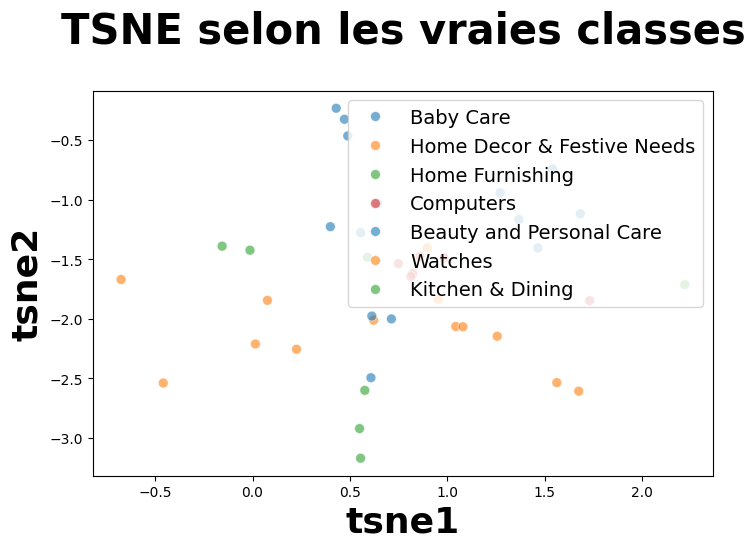

In [54]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement


In [55]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=4, n_init=100)
cls.fit(X_tsne)

KMeans(n_clusters=4, n_init=100)

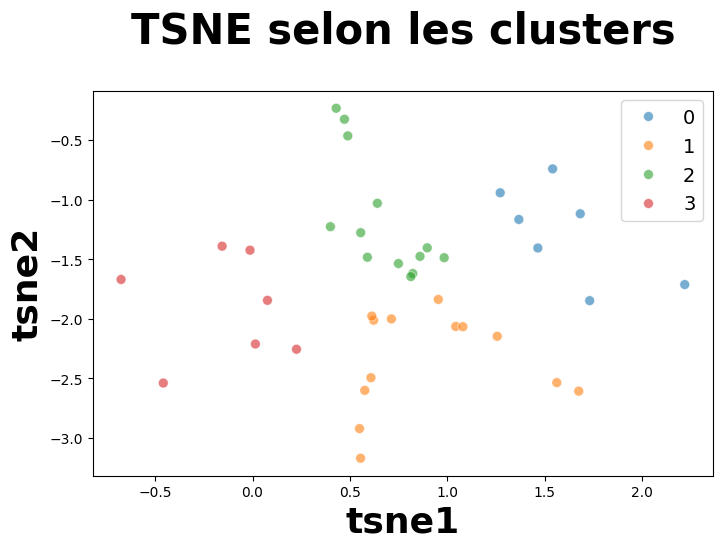

ARI :  0.2722380304342447


In [56]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

Inspecting Image ID: 0
Filename: 0991e8d8f884003ab18890971191085d.jpg
Label: Baby Care
Full Path: ./data/Flipkart/Images/dataset_train_sample/0991e8d8f884003ab18890971191085d.jpg


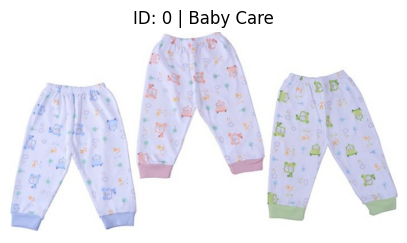

In [59]:
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Define the base directory
base_dir = "./data/Flipkart/Images/dataset_train_sample/"

# --- FIX: Set 'id' to a valid index (between 0 and len(data)-1) ---
id = 0  # <--- Change this number to view different images (e.g., 10, 50, 100)

# Get the filename from the dataframe
image_name = data["image_path"][id]
label = data["label_name"][id]

# Construct the full path
filename = os.path.join(base_dir, image_name)

print(f"Inspecting Image ID: {id}")
print(f"Filename: {image_name}")
print(f"Label: {label}")
print(f"Full Path: {filename}")

# Verify if file exists and display
if os.path.exists(filename):
    image = imread(filename)
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"ID: {id} | {label}")
    plt.show()
else:
    print(f"Error: File not found at {filename}")

* Analyse : le modèle pré-entraîné confond "cloud" avec de la neige ...

### Analyse par classes

In [60]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[5 2 1 0 0 0 0]
 [0 1 0 5 0 0 0]
 [1 3 0 0 0 0 0]
 [1 0 5 0 0 0 0]
 [0 1 5 0 0 0 0]
 [0 6 1 0 0 0 0]
 [0 0 1 2 0 0 0]]


In [61]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [62]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0 5 3 1 0 0 0]
[[5 0 0 1 0 2 0]
 [0 5 0 0 0 1 0]
 [1 0 0 0 0 3 0]
 [1 0 0 5 0 0 0]
 [0 0 0 5 0 1 0]
 [0 0 0 1 0 6 0]
 [0 2 0 1 0 0 0]]

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.71      0.83      0.77         6
           2       0.00      0.00      0.00         4
           3       0.38      0.83      0.53         6
           4       0.00      0.00      0.00         6
           5       0.46      0.86      0.60         7
           6       0.00      0.00      0.00         3

    accuracy                           0.53        40
   macro avg       0.32      0.45      0.37        40
weighted avg       0.39      0.53      0.43        40



/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Penser à changer le 0 1 2 3 4 5 6 si la taille n'est pas bonne

<Axes: >

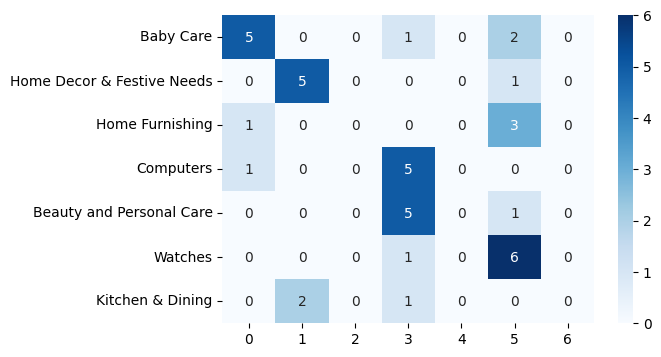

In [64]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* La classe la moins bien prédite est "shine" (CF exemple ci-dessus : confond la neige avec un nuage)

Changer le commmentaire

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle


## Création du modèle de classification

In [85]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # WARNING : le premier nombre désigne le nombre de catégories qu'on a.
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

## Approche préparation initiale des images

In [68]:
print(len(data['image_path']))

40


In [75]:
def image_prep_fct(data, base_directory) :
    prepared_images = []
    for image_num in range(len(data['image_path'])) :
        image_name = data["image_path"][image_num]
        image_file = os.path.join(base_directory, image_name)
        img = (load_img(
            image_file,
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(data, base_directory=base_dir)
print(images_np.shape)
images_np_test = image_prep_fct(data_test, base_directory=base_dir_test)
print(images_np_test.shape)

(40, 224, 224, 3)
(272, 224, 224, 3)


In [77]:
data_test.head()

,image_path,label_name
0,9a9402ad55d079c86c302521816b7b0e.jpg,Computers
1,9c4ab8ab059c912090c83cb0818e7f1c.jpg,Home Decor & Festive Needs
2,1d829e0eac91d7e85cdd6d581c363360.jpg,Beauty and Personal Care
3,5c7b493625b5fc6689cae49d25e1ae17.jpg,Beauty and Personal Care
4,5cd3d274d71e1e0d6bf075421461b2d5.jpg,Home Furnishing


In [78]:
data.head()

,image_path,label_name,label
0,0991e8d8f884003ab18890971191085d.jpg,Baby Care,0
1,968a2b3be84193e3f755c2fe71033a2c.jpg,Home Decor & Festive Needs,1
2,908cc351957d02f72f60916006c531ba.jpg,Home Decor & Festive Needs,1
3,789cf5578f48577a44586fca3adc35d0.jpg,Home Furnishing,2
4,01089dc3618a0ab7304d784ef400b83d.jpg,Computers,3


In [81]:
X = images_np
y = to_categorical(data['label'])

X_test = images_np_test
y_test = to_categorical(data_test['label'])

y

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(30, 224, 224, 3)

In [87]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [88]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1667 - loss: 10.2527
Epoch 1: val_loss improved from None to 10.60377, saving model to ./model1_best_weights.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1667 - loss: 10.2527 - val_accuracy: 0.2000 - val_loss: 10.6038
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5333 - loss: 2.8887
Epoch 2: val_loss did not improve from 10.60377
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5333 - loss: 2.8887 - val_accuracy: 0.2000 - val_loss: 10.7454
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5333 - loss: 2.9400
Epoch 3: val_loss improved from 10.60377 to 6.31976, saving model to ./model1_best_weights.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5333 - loss: 2.9400 - val_accuracy: 0.3000 - val_loss: 6.3198
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7333 - loss: 1.8823
Epoch 4: val_loss did not improve from 6.31976
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7333 - loss: 1.8823 - val_accuracy: 0.3000 - val_loss: 7.1332
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7333 - loss: 0.7374
Epoch 5: val_loss did not improve from 6.31976
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7333 - loss: 0.7374 - val_accuracy: 0.3000 - val_loss: 6.8641
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7333 - loss: 2.0962
Epoch 6: val_loss improved from 6.31976 to 6.07774, saving model to ./model1_best_weights.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7333 - loss: 2.0962 - val_accuracy: 0.4000 - val_loss: 6.0777
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8333 - loss: 0.5326
Epoch 7: val_loss improved from 6.07774 to 5.63653, saving model to ./model1_best_weights.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8333 - loss: 0.5326 - val_accuracy: 0.3000 - val_loss: 5.6365
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9000 - loss: 0.2806
Epoch 8: val_loss did not improve from 5.63653
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9000 - loss: 0.2806 - val_accuracy: 0.3000 - val_loss: 5.8633
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9333 - loss: 0.4407
Epoch 9: val_loss did not improve from 5.63653
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9333 - loss: 0.4407 - val_accuracy: 0.3000 - val_loss: 5.6937
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0064
Epoch 10: val_loss did not improve from 5.63653
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.3000 - val_loss: 5.6906
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9667 - loss: 0.0680
Epoch 11: val_loss did not improve from 5.63653
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step 

In [89]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 6.4473e-05
Training Accuracy: 1.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 6.4393
Validation Accuracy:  0.4000


In [90]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.3000
Test Accuracy       :  0.5074


from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [92]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[3 0 5 4 6 2 5 0 1 1]

[6 1 5 4 4 0 4 0 6 2]


In [93]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0]]


In [94]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 0 1 0 4 5 1]
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0]]

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.38      0.50      0.40        10
weighted avg       0.50      0.60      0.50        10



/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

<Axes: >

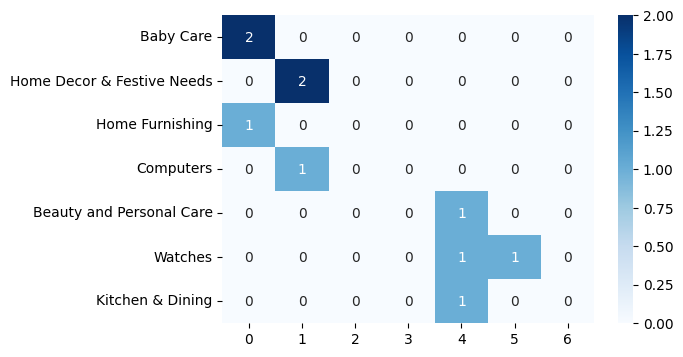

In [96]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* Les images "shine" contenant de la neige sont désormais bien affectées à "shine" et non pas "cloud"

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [99]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='image_path', y_col='label_name',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [100]:
datagen_train = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

train_flow = data_flow_fct(data, datagen_train, data_type='training')
val_flow = data_flow_fct(data, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:918: UserWarning: Found 40 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:918: UserWarning: Found 40 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/Users/j/Documents/OC_Inge_IA/Projet_6_copie/.venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:918: UserWarning: Found 272 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [101]:
# Création du modèle
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [102]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [103]:
with tf.device('/gpu:0'): 
    history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


ValueError: The PyDataset has length 0

In [ ]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

10/10 [==============================] - 5s 527ms/step - loss: 0.0232 - accuracy: 0.9933
Training Accuracy   : 0.9933

4/4 [==============================] - 2s 399ms/step - loss: 0.1789 - accuracy: 0.9400
Validation Accuracy :  0.9400


In [ ]:
# Score de l'epoch optimal

model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.9500
Test Accuracy       :  0.8900


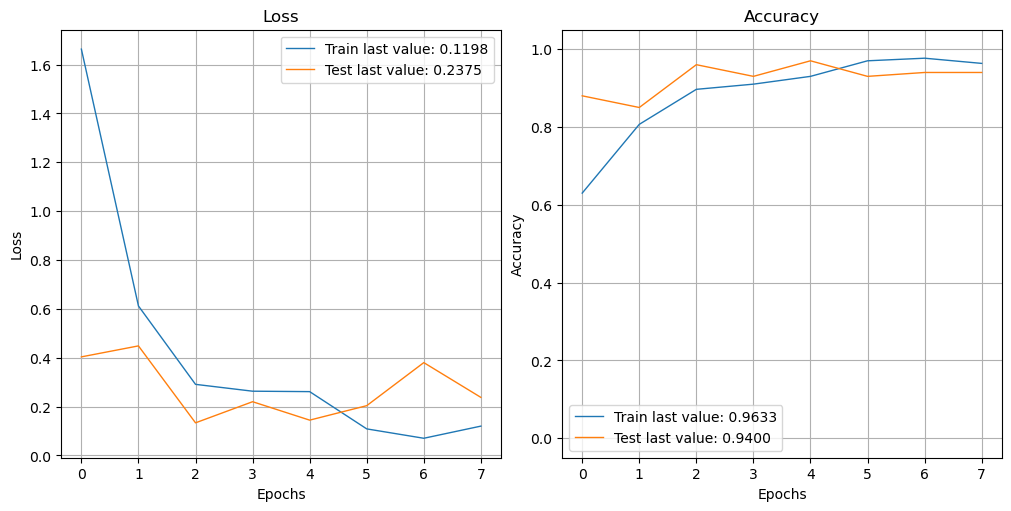

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=32, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [ ]:
dataset_train = dataset_fct(path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(path_test, validation_split=0, data_type=None)

Found 400 files belonging to 4 classes.
Using 300 files for training.
Found 400 files belonging to 4 classes.
Using 100 files for validation.
Found 100 files belonging to 4 classes.


In [ ]:
# Création du modèle
with tf.device('/gpu:0'): 
    model3 = create_model_fct()

# Création du callback
model3_save_path = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
with tf.device('/gpu:0'): 
    history3 = model3.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
 9/10 [==========================>...] - ETA: 0s - loss: 2.7547 - accuracy: 0.5799
Epoch 1: val_loss improved from inf to 0.65452, saving model to .\model3_best_weights.h5
10/10 [==============================] - 3s 188ms/step - loss: 2.6716 - accuracy: 0.5933 - val_loss: 0.6545 - val_accuracy: 0.8400
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.8903 - accuracy: 0.8033
Epoch 2: val_loss improved from 0.65452 to 0.21269, saving model to .\model3_best_weights.h5
10/10 [==============================] - 2s 158ms/step - loss: 0.8903 - accuracy: 0.8033 - val_loss: 0.2127 - val_accuracy: 0.9100
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.5598 - accuracy: 0.8833
Epoch 3: val_loss improved from 0.21269 to 0.19603, saving model to .\model3_best_weights.h5
10/10 [==============================] - 2s 159ms/step - loss: 0.5598 - accuracy: 0.8833 - val_loss: 0.1960 - val_accuracy: 0.9100
Epoch 4/50
10/10 [==============================] 

In [ ]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

10/10 [==============================] - 1s 95ms/step - loss: 0.0260 - accuracy: 0.9900
Training Accuracy   : 0.9900

4/4 [==============================] - 1s 74ms/step - loss: 0.3030 - accuracy: 0.9500
Validation Accuracy :  0.9500


In [ ]:
# Score de l'epoch optimal

model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.9700
Test Accuracy       :  0.8400


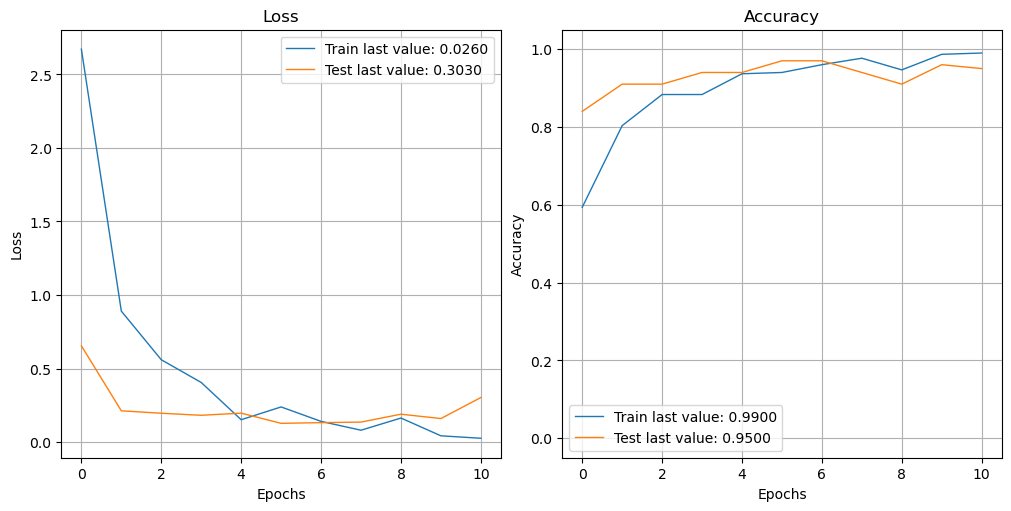

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history3)
plot_history(history3, path="standard.png")
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [ ]:
dataset_train = dataset_fct(path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(path_test, validation_split=0, data_type=None)

Found 400 files belonging to 4 classes.
Using 300 files for training.
Found 400 files belonging to 4 classes.
Using 100 files for validation.
Found 100 files belonging to 4 classes.


In [ ]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label



In [ ]:
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(4, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

In [ ]:
# Création du modèle
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
with tf.device('/gpu:0'): 
    history4 = model4.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.3576 - accuracy: 0.3333
Epoch 1: val_loss improved from inf to 1.07517, saving model to .\model4_best_weights.h5
10/10 [==============================] - 9s 372ms/step - loss: 1.3576 - accuracy: 0.3333 - val_loss: 1.0752 - val_accuracy: 0.6400
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.0039 - accuracy: 0.5967
Epoch 2: val_loss improved from 1.07517 to 0.83699, saving model to .\model4_best_weights.h5
10/10 [==============================] - 4s 331ms/step - loss: 1.0039 - accuracy: 0.5967 - val_loss: 0.8370 - val_accuracy: 0.7600
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.8124 - accuracy: 0.7367
Epoch 3: val_loss improved from 0.83699 to 0.70421, saving model to .\model4_best_weights.h5
10/10 [==============================] - 4s 325ms/step - loss: 0.8124 - accuracy: 0.7367 - val_loss: 0.7042 - val_accuracy: 0.8200
Epoch 4/50
10/10 [==============================] 

10/10 [==============================] - ETA: 0s - loss: 0.1833 - accuracy: 0.9567
Epoch 19: val_loss improved from 0.26770 to 0.25773, saving model to .\model4_best_weights.h5
10/10 [==============================] - 4s 338ms/step - loss: 0.1833 - accuracy: 0.9567 - val_loss: 0.2577 - val_accuracy: 0.9200
Epoch 20/50
10/10 [==============================] - ETA: 0s - loss: 0.1700 - accuracy: 0.9567
Epoch 20: val_loss improved from 0.25773 to 0.25432, saving model to .\model4_best_weights.h5
10/10 [==============================] - 4s 335ms/step - loss: 0.1700 - accuracy: 0.9567 - val_loss: 0.2543 - val_accuracy: 0.9300
Epoch 21/50
10/10 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9400
Epoch 21: val_loss improved from 0.25432 to 0.24227, saving model to .\model4_best_weights.h5
10/10 [==============================] - 4s 332ms/step - loss: 0.2127 - accuracy: 0.9400 - val_loss: 0.2423 - val_accuracy: 0.9200
Epoch 22/50
10/10 [==============================] -

10/10 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.9833
Epoch 46: val_loss did not improve from 0.16185
10/10 [==============================] - 4s 329ms/step - loss: 0.0862 - accuracy: 0.9833 - val_loss: 0.1698 - val_accuracy: 0.9300
Epoch 47/50
10/10 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9867
Epoch 47: val_loss did not improve from 0.16185
10/10 [==============================] - 4s 327ms/step - loss: 0.0654 - accuracy: 0.9867 - val_loss: 0.1624 - val_accuracy: 0.9400
Epoch 48/50
10/10 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.9833
Epoch 48: val_loss did not improve from 0.16185
10/10 [==============================] - 4s 325ms/step - loss: 0.0739 - accuracy: 0.9833 - val_loss: 0.1809 - val_accuracy: 0.9200
Epoch 49/50
10/10 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9833
Epoch 49: val_loss did not improve from 0.16185
10/10 [==============================] - 4s 327

In [ ]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

10/10 [==============================] - 2s 95ms/step - loss: 0.0652 - accuracy: 0.9967
Training Accuracy   : 0.9967

4/4 [==============================] - 0s 75ms/step - loss: 0.1619 - accuracy: 0.9400
Validation Accuracy :  0.9400


In [ ]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.9400
Test Accuracy       :  0.9000


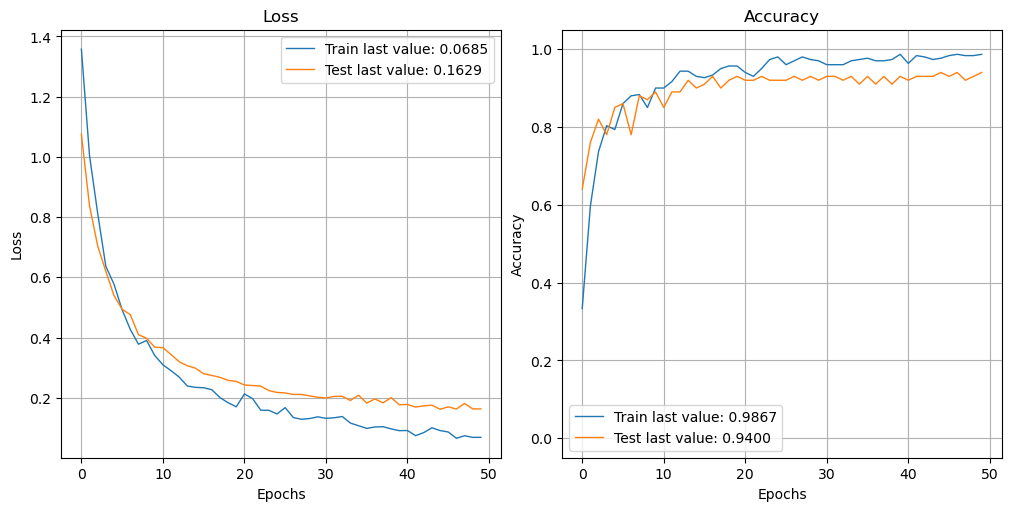

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4)
plot_history(history4, path="standard.png")
plt.close()